# 1. Logistic Regression as a Neural Network 


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [ ]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [ ]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

- Y_prediction_test for the predictions on the test set
- Y_prediction_train for the predictions on the train set
- w, costs, grads for the outputs of optimize()

In [ ]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
# reading data
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bioresponse = pd.read_csv('/content/drive/My Drive/ITMO/ML/Lab1/bioresponse.csv')
bioresponse.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# data splitting
x_train, x_test, y_train, y_test = train_test_split(bioresponse.iloc[:,1:],
                                                    bioresponse.iloc[:,0],
                                                    test_size=0.25,
                                                    random_state=42)
x_train = np.asarray(x_train).T
x_test = np.asarray(x_test).T
y_train = np.asarray(y_train).T
y_test = np.asarray(y_test).T

In [ ]:
# train the model 
d = model(x_train, y_train, x_test, y_test, 800, 0.001,True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.681095
Cost after iteration 200: 0.673994
Cost after iteration 300: 0.667662
Cost after iteration 400: 0.661794
Cost after iteration 500: 0.656314
Cost after iteration 600: 0.651172
Cost after iteration 700: 0.646329
train accuracy: 67.01030927835052 %
test accuracy: 69.61620469083155 %


# 2. Stochastic grasient descent (SGD) method

In [ ]:
# optimize

def optimize_SGD(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a stochastic gradient descent algorithm

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    """

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation
        batch_start = np.random.randint(0, X.shape[1] - 10)
        x_sample = X[:, batch_start:batch_start + 10]
        y_sample = Y[batch_start:batch_start + 10]
        grads, cost = propagate(w,b,x_sample,y_sample)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
def model_SGD(x_train, y_train, x_test, y_test, num_iterations, learning_rate, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(x_train.shape[0])
    # print(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize_SGD(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, x_test)
    Y_prediction_train = predict(w, b, x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [ ]:
sgd = model_SGD(x_train, y_train, x_test, y_test, 800, 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.684872
Cost after iteration 200: 0.623495
Cost after iteration 300: 0.631824
Cost after iteration 400: 0.662783
Cost after iteration 500: 0.711427
Cost after iteration 600: 0.722628
Cost after iteration 700: 0.655008
train accuracy: 64.3796658371845 %
test accuracy: 67.59061833688699 %


# 3. Plotting the learning curves

In [ ]:
def plot_lc(GD, SGD, learning_rate):
    plt.figure(figsize=(10, 10))
    plt.plot(GD['costs'], label="BGD")
    plt.plot(SGD['costs'], label="SGD")
    plt.title(f'The learning curves  GD and SGD with learning_rate {learning_rate}', fontsize=15)
    plt.xlabel('Iteration, hundreds', fontsize=12)
    plt.ylabel('Cost', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
ls = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5] # learning rates

In [ ]:
# Train 5 different models using vanilla GD with 5 different learning rates

GD1 = model(x_train, y_train, x_test, y_test, 1000, ls[0])
GD2 = model(x_train, y_train, x_test, y_test, 1000, ls[1])
GD3 = model(x_train, y_train, x_test, y_test, 1000, ls[2])
GD4 = model(x_train, y_train, x_test, y_test, 1000, ls[3])
GD5 = model(x_train, y_train, x_test, y_test, 1000, ls[4])

train accuracy: 82.26093138997511 %
test accuracy: 76.97228144989339 %
train accuracy: 77.10629221471739 %
test accuracy: 74.73347547974413 %
train accuracy: 67.7568432278706 %
test accuracy: 69.40298507462687 %
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %


In [ ]:
SGD1 = model_SGD(x_train, y_train, x_test, y_test, 1000, ls[0])
SGD2 = model_SGD(x_train, y_train, x_test, y_test, 1000, ls[1])
SGD3 = model_SGD(x_train, y_train, x_test, y_test, 1000, ls[2])
SGD4 = model_SGD(x_train, y_train, x_test, y_test, 1000, ls[3])
SGD5 = model_SGD(x_train, y_train, x_test, y_test, 1000, ls[4])

train accuracy: 77.10629221471739 %
test accuracy: 72.38805970149254 %
train accuracy: 76.99964450764308 %
test accuracy: 74.52025586353945 %
train accuracy: 68.21898329185922 %
test accuracy: 70.04264392324095 %
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %
train accuracy: 53.288304301457515 %
test accuracy: 57.0362473347548 %


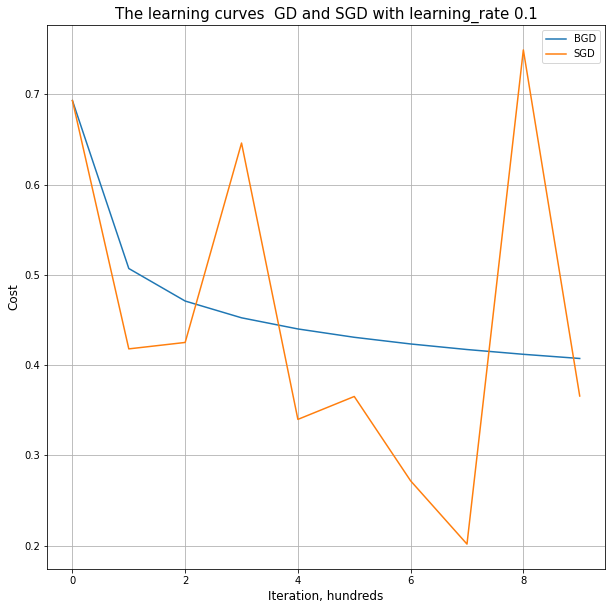

In [ ]:
plot_lc(GD1, SGD1, ls[0])

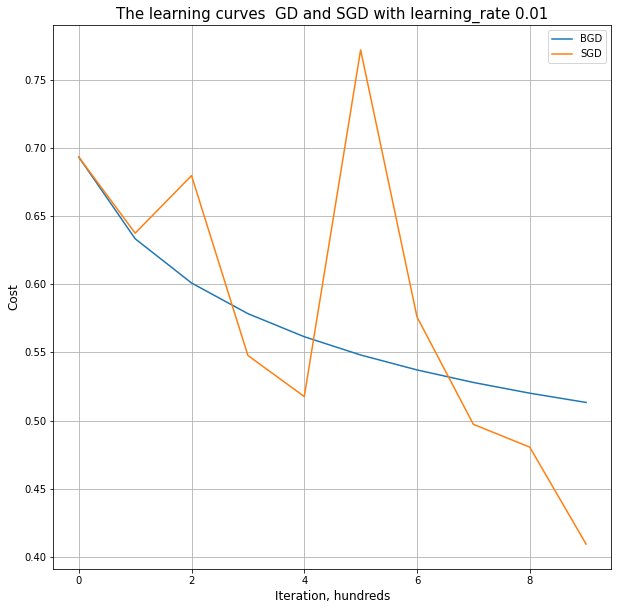

In [ ]:
plot_lc(GD2, SGD2, ls[1])

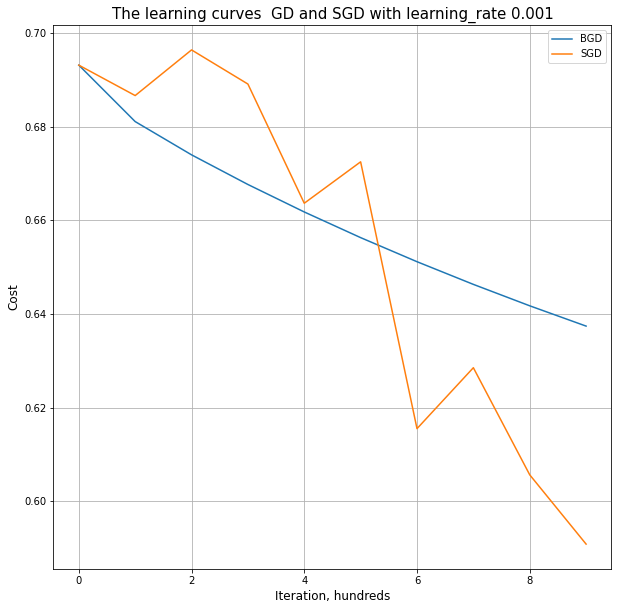

In [ ]:
plot_lc(GD3, SGD3, ls[2])

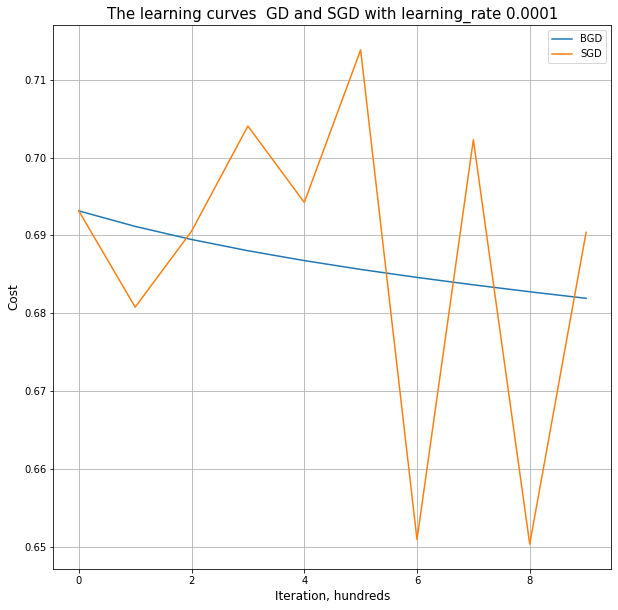

In [ ]:
plot_lc(GD4, SGD4, ls[3])

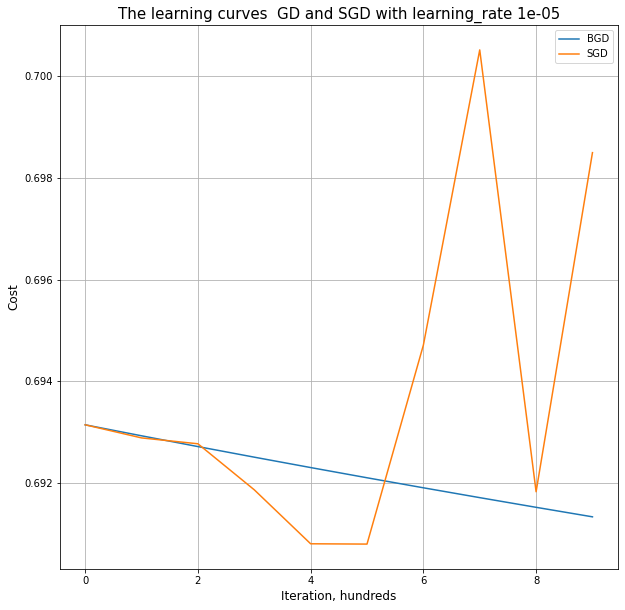

In [ ]:
plot_lc(GD5, SGD5, ls[4])

Conclusion: 
The best accuracy in GD and SGD we obtained in learning_rate = 0.1

# 4. Adam optimization method

In [ ]:
def update_parameters_with_adam(w, grad):
    learning_rate = 0.001 
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-7
    t = 0
    k = 1
    m = None  # Decaying averages of past gradients
    v = None  # Decaying averages of past squared gradients
    
    t+=1
    if m is None:
        m = np.zeros(np.shape(grad))
        v = np.zeros(np.shape(grad))

    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * np.square(grad)

    m_corrected = m / (1 - beta1 ** t)
    v_corrected = v / (1 - beta2** t)

    w_update = learning_rate * m_corrected / (np.sqrt(v_corrected) + eps)

    return w - w_update

In [ ]:
def optimize_Adam(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []

    for i in range(num_iterations):

        # Cost and gradient calculation      
        grads, cost = propagate(w,b,X,Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        w = update_parameters_with_adam(w, dw)
        b -= learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
def model_Adam(x_train, y_train, x_test, y_test, num_iterations, learning_rate, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(x_train.shape[0])
    # print(X_train.shape[0])
    # Gradient descent
    parameters, grads, costs = optimize_Adam(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    Y_prediction_test = predict(w, b, x_test)
    Y_prediction_train = predict(w, b, x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [ ]:
ad = model_Adam(x_train, y_train, x_test, y_test, 1000, 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.495165
Cost after iteration 200: 0.450725
Cost after iteration 300: 0.426562
Cost after iteration 400: 0.409894
Cost after iteration 500: 0.397014
Cost after iteration 600: 0.387147
Cost after iteration 700: 0.379209
Cost after iteration 800: 0.372500
Cost after iteration 900: 0.367887
train accuracy: 84.57163170991824 %
test accuracy: 76.33262260127933 %


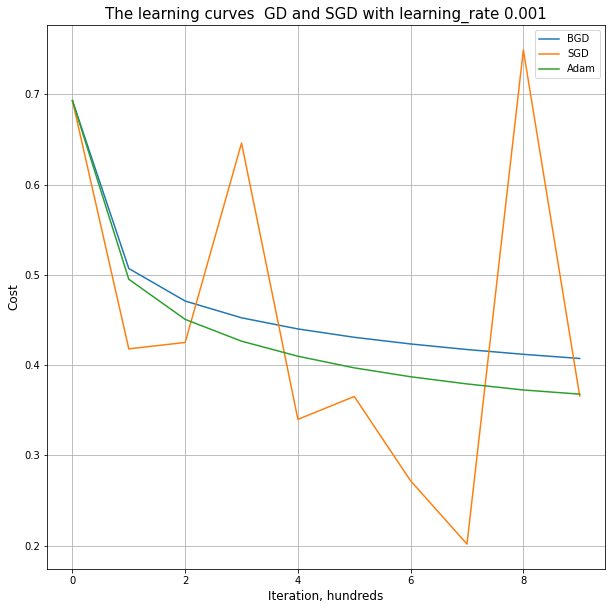

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(GD1['costs'], label="BGD")
plt.plot(SGD1['costs'], label="SGD")
plt.plot(ad['costs'], label="Adam")
plt.title('The learning curves  GD and SGD with learning_rate 0.001', fontsize=15)
plt.xlabel('Iteration, hundreds', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()